# 🛳️ Primer modelo: Titanic — Predicción de Supervivencia

Vamos a trabajar con el famoso dataset del Titanic para construir nuestro primer modelo de *Machine Learning*.

**Objetivo:** predecir si un pasajero sobrevivió o no en función de sus características (edad, sexo, clase, tarifa, etc.).

Se trata de un problema de **clasificación** porque nuestro objetivo es predecir si un pasajero **sobrevive (1)** o **no sobrevive (0)**.
Como la variable objetivo es **binaria (sí/no)**, se trata de un problema de **clasificación binaria**, no de regresión.


En este proyecto usamos **K-Nearest Neighbors (KNN)** porque es un algoritmo:

* Fácil de entender y visualizar
* Bueno para empezar a aprender Machine Learning
* No requiere asumir relaciones matemáticas complicadas
* Funciona bien en problemas pequeños como Titanic

KNN clasifica a un pasajero **mirando los pasajeros más similares** y votando qué clase es más común (sobrevive o no sobrevive).

**¿Qué otros modelos podríamos usar?**

Como es un problema de **clasificación**, podríamos usar otros algoritmos como:

| Modelo                           | Motivo                                   |
| -------------------------------- | ---------------------------------------- |
| **Regresión logística**          | Modelo base, interpretable y muy usado   |
| **Árbol de decisión**            | Fácil de entender visualmente            |
| **Random Forest**                | Varios árboles para mejor precisión      |
| **Gradient Boosting / XGBoost**  | Muy buenos resultados (más avanzados)    |
| **Support Vector Machine (SVM)** | Clasificador potente para datos pequeños |
| **Naive Bayes**                  | Rápido y fácil para empezar              |


En este notebook haremos:

1. **Cargar el dataset**
4. **Entrenar un modelo de Machine Learning**
5. **Evaluar el modelo**

Nos saltamos los pasos de EDA y preprocesamiento. Con ello, veremos que los resultados obtenidos son bastante malos.




✅ Exactitud (accuracy): 62.2 %


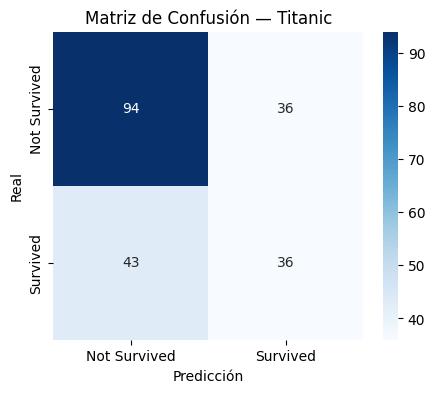

In [ ]:
# =========================================================
# TITANIC - CLASIFICACIÓN CON KNN (sin EDA y preprocesamiento)
# =========================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Cargar dataset
df = pd.read_csv("sample_data/titanic.csv")

# 2️⃣ Usar solo columnas numéricas (sin limpiar)
features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
target = 'Survived'

X = df[features]
y = df[target]

# ⚠️ NO rellenamos los nulos → se eliminan filas incompletas
df_clean = df[features + [target]].dropna()
X = df_clean[features]
y = df_clean[target]

# 3️⃣ División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Entrenamiento sin escalado
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 5️⃣ Evaluación
print("✅ Exactitud (accuracy):", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Gráfico para la matriz de confusión
labels = ["Not Survived", "Survived"]
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión — Titanic')
plt.show()